In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

In [2]:
plt.rcParams['figure.figsize'  ] = (3.3,2.8)
plt.rcParams['font.size'       ] = 8
plt.rcParams['legend.fontsize' ] = 8
plt.rcParams['legend.frameon'  ] = False
plt.rcParams['font.family'     ] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction' ] = 'in'
plt.rcParams['ytick.direction' ] = 'in'
plt.rcParams['xtick.top'       ] = True
plt.rcParams['ytick.right'     ] = True
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['xtick.major.width'] = 0.75
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.75
plt.rcParams['ytick.minor.width'] = 0.5

In [3]:
num = 120

In [4]:
a = lambda z: 1/(1 + z)
z = lambda a: 1/a - 1

In [5]:
a_list = 10**(np.linspace(np.log10(a(30)), np.log10(a(5)), num))
z_list = z(a_list)

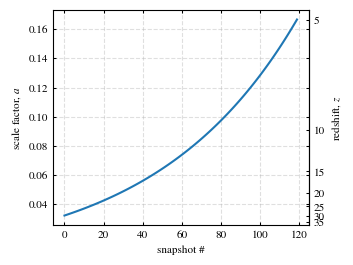

In [6]:
fig, ax = plt.subplots()
ax.plot(a_list)

ax_ = ax.secondary_yaxis("right", functions=(z,a))

ax.set_xlabel("snapshot #")
ax.set_ylabel(r"scale factor, $a$")
ax_.set_ylabel(r"redshift, $z$")
ax.grid(alpha=0.4, ls="dashed")

plt.savefig("snap_list.pdf")

In [7]:
timestep = np.diff(cosmo.age(z_list)).to(u.Myr)

In [8]:
timestep.min(), timestep.max()

(<Quantity 2.08484961 Myr>, <Quantity 23.94157785 Myr>)

In [9]:
t_H = lambda z: (1/cosmo.H(z)).to(u.Myr).value

In [10]:
hubble_time = t_H(z_list)

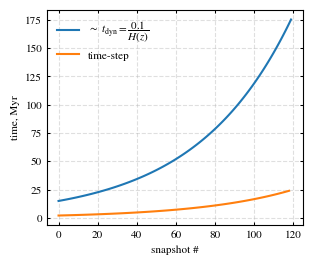

In [11]:
fig, ax = plt.subplots()

ax.plot(0.1 * hubble_time, label=r"$\sim~t_{\rm dyn} = \dfrac{0.1}{H(z)}$")
ax.plot(timestep, label="time-step")


ax.set_xlabel("snapshot #")
ax.set_ylabel("time, Myr")
ax.grid(alpha=0.4, ls="dashed")

ax.legend()
plt.savefig("cadence_compare.pdf")

In [12]:
np.savetxt("a_list.txt", a_list)